In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 33.0 MB/s eta 0:00:00


In [2]:
!pip install -U scikit-fuzzy networks

  Preparing metadata (setup.py) ... done
  Created wheel for networks: filename=networks-0.3.7-py3-none-any.whl size=11635 sha256=09c97bf661b19603d7382864cc4e0e1f5c341df07e04c77042eb7c8b299f606f
  Stored in directory: /root/.cache/pip/wheels/ff/67/17/406c586d04b0cb8e190903c362efbbf442987a74d5df2a78e4
Successfully built networks


In [16]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [17]:
room_temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'room_temperature')
comfort_level = ctrl.Antecedent(np.arange(0, 5, 0.1), 'comfort_level')
heating_power = ctrl.Consequent(np.arange(0, 101, 1), 'heating_power')

In [30]:
room_temperature['cold'] = fuzz.trimf(room_temperature.universe, [0, 0, 15])
room_temperature['comfortable'] = fuzz.trimf(room_temperature.universe, [10, 20, 30])
room_temperature['hot'] = fuzz.trimf(room_temperature.universe, [25, 40, 40])


In [31]:
comfort_level['very_cold'] = fuzz.trimf(comfort_level.universe, [0, 0, 1])
comfort_level['cold'] = fuzz.trimf(comfort_level.universe, [0, 1, 2])
comfort_level['comfortable'] = fuzz.trimf(comfort_level.universe, [1, 2, 3])
comfort_level['warm'] = fuzz.trimf(comfort_level.universe, [2, 3, 4])
comfort_level['very_warm'] = fuzz.trimf(comfort_level.universe, [3, 4, 4])


In [32]:
heating_power['low'] = fuzz.trimf(heating_power.universe, [0, 0, 30])
heating_power['medium'] = fuzz.trimf(heating_power.universe, [20, 50, 80])
heating_power['high'] = fuzz.trimf(heating_power.universe, [60, 100, 100])


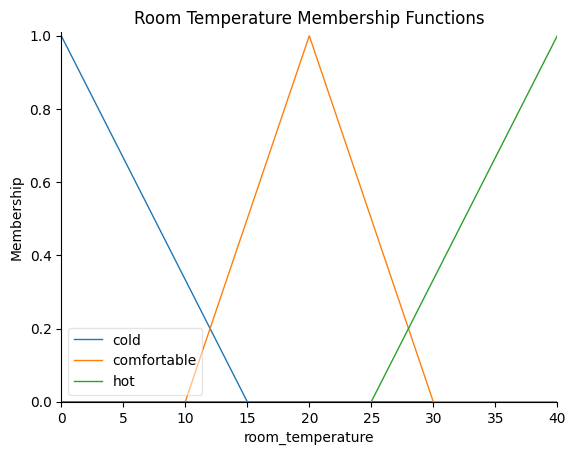

In [33]:
room_temperature.view()
plt.title('Room Temperature Membership Functions')
plt.show()

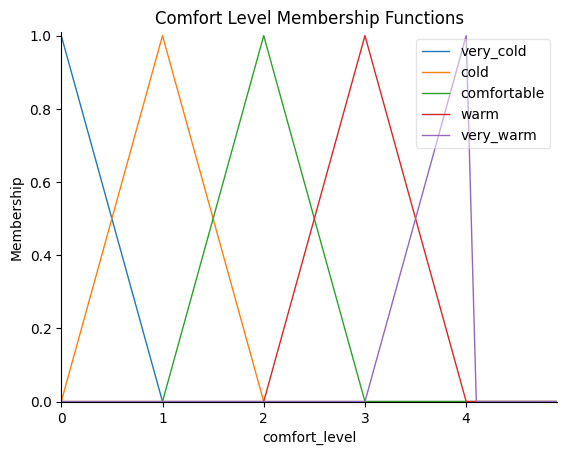

In [34]:
comfort_level.view()
plt.title('Comfort Level Membership Functions')
plt.show()

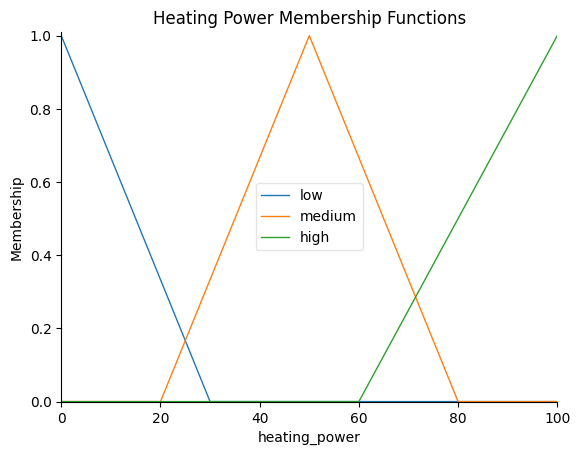

In [35]:
heating_power.view()
plt.title('Heating Power Membership Functions')
plt.show()

In [36]:
rule1 = ctrl.Rule(room_temperature['cold'] & comfort_level['very_warm'], heating_power['high'])
rule2 = ctrl.Rule(room_temperature['cold'] & comfort_level['warm'], heating_power['high'])
rule3 = ctrl.Rule(room_temperature['cold'] & comfort_level['comfortable'], heating_power['medium'])
rule4 = ctrl.Rule(room_temperature['comfortable'] & comfort_level['very_cold'], heating_power['high'])
rule5 = ctrl.Rule(room_temperature['comfortable'] & comfort_level['cold'], heating_power['medium'])
rule6 = ctrl.Rule(room_temperature['comfortable'] & comfort_level['comfortable'], heating_power['low'])
rule7 = ctrl.Rule(room_temperature['hot'] & comfort_level['very_cold'], heating_power['high'])
rule8 = ctrl.Rule(room_temperature['hot'] & comfort_level['cold'], heating_power['medium'])
rule9 = ctrl.Rule(room_temperature['hot'] & comfort_level['comfortable'], heating_power['low'])
rule10 = ctrl.Rule(room_temperature['hot'] & comfort_level['warm'], heating_power['low'])
rule11 = ctrl.Rule(room_temperature['comfortable'] & comfort_level['very_warm'], heating_power['low'])
rule12 = ctrl.Rule(room_temperature['hot'] & comfort_level['very_warm'], heating_power['low'])
rule13 = ctrl.Rule(room_temperature['comfortable'] & comfort_level['warm'], heating_power['low'])
rule14 = ctrl.Rule(room_temperature['hot'] & comfort_level['warm'], heating_power['low'])


In [37]:
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,rule11,rule12,rule13,rule14])
heating = ctrl.ControlSystemSimulation(heating_ctrl)

Recommended heating power: 83.11


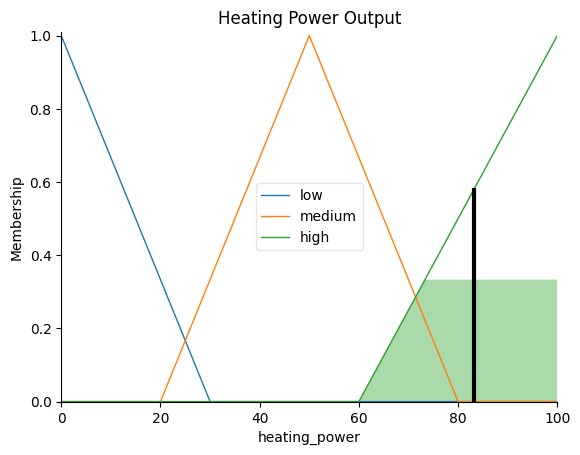

In [38]:
room_temp_input = 10
comfort_input = 4

heating.input['room_temperature'] = room_temp_input
heating.input['comfort_level'] = comfort_input

heating.compute()

heating_power_output = heating.output['heating_power']
print(f"Recommended heating power: {heating_power_output:.2f}")

heating_power.view(sim=heating)
plt.title('Heating Power Output')
plt.show()

Recommended heating power: 12.88


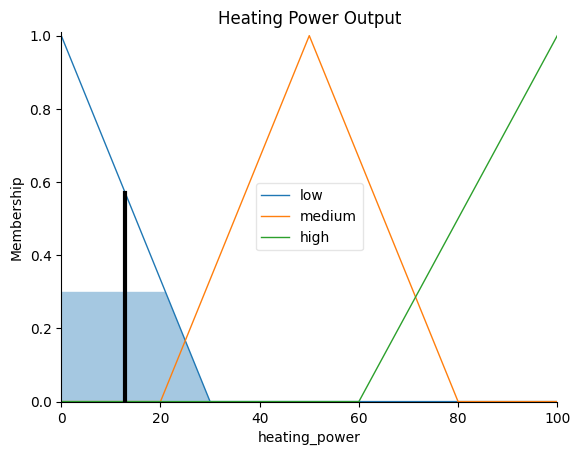

In [43]:
room_temp_input = 27
comfort_input = 4

heating.input['room_temperature'] = room_temp_input
heating.input['comfort_level'] = comfort_input

heating.compute()

heating_power_output = heating.output['heating_power']
print(f"Recommended heating power: {heating_power_output:.2f}")

heating_power.view(sim=heating)
plt.title('Heating Power Output')
plt.show()

Recommended heating power: 69.32


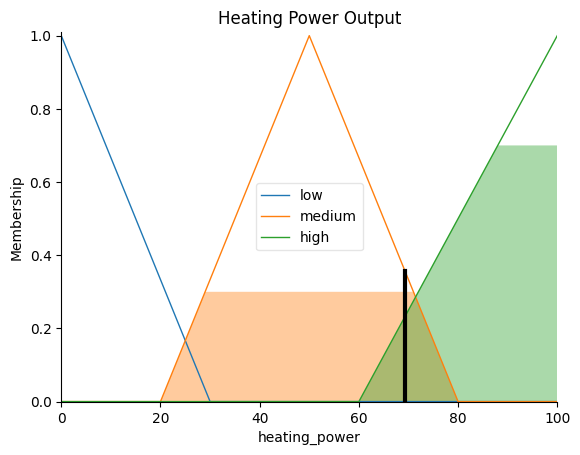

In [47]:
room_temp_input = 40
comfort_input = 0.3

heating.input['room_temperature'] = room_temp_input
heating.input['comfort_level'] = comfort_input

heating.compute()

heating_power_output = heating.output['heating_power']
print(f"Recommended heating power: {heating_power_output:.2f}")

heating_power.view(sim=heating)
plt.title('Heating Power Output')
plt.show()